# Import libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load, understand, and visualize the data

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(f"Number of features: {df.shape[1]}")
print(f"Number of objects: {df.shape[0]}")

# Add target
df['target'] = data.target
df['target'] = df['target']
print(f"Shape: {df.shape}")
print(df.head())

Number of features: 4
Number of objects: 150
Shape: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [5]:
# Check for missing data
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
labels = data.target_names
feature_names = data.feature_names
print(f"Number of Classes: {len(labels)} \n {labels}")
print(f"Number of Features: {len(feature_names)} \n {feature_names}")

Number of Classes: 3 
 ['setosa' 'versicolor' 'virginica']
Number of Features: 4 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<Axes: >

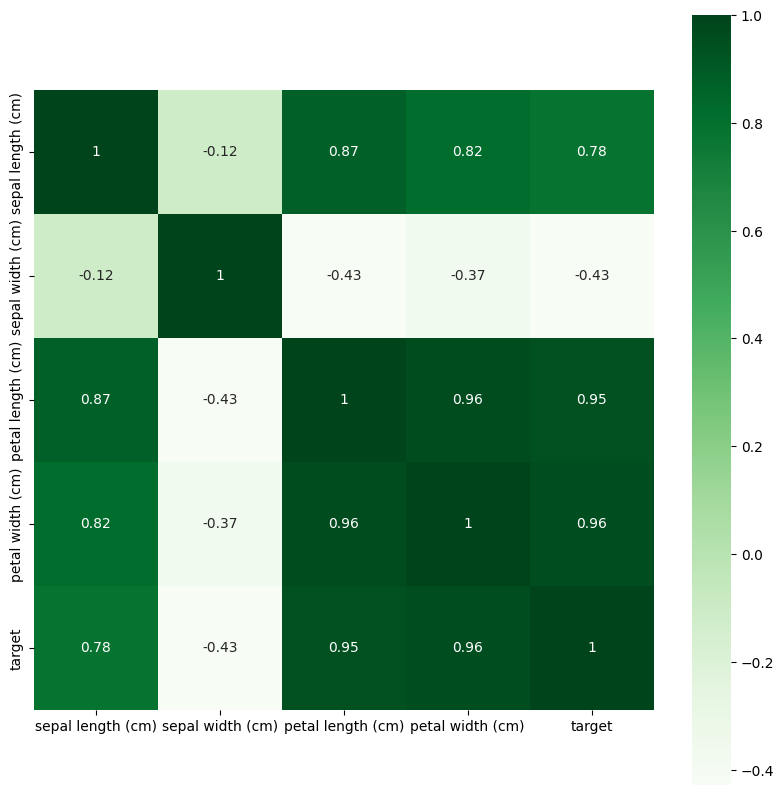

In [7]:
# Visualize the data
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, annot=True, annot_kws={"size":10}, cmap="Greens")

# Split the dataset

In [8]:
X = df[feature_names]
y = df["target"]

# Split the data into train and test sets with a ratio of (7|3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:3])

[[-0.4134164  -1.46200287 -0.09951105 -0.32339776]
 [ 0.55122187 -0.50256349  0.71770262  0.35303182]
 [ 0.67180165  0.21701605  0.95119225  0.75888956]]


# Train the model

In [10]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

# Evaluate the model

##  Evaluation on the training set

In [11]:
# Model predictions on the training set
y_pred_train = mlp.predict(X_train)

# Check on 10 instances
print("Input: " + str(X_train[0:9]))
print("Output: " + str(y_pred_train[0:9]))
print("True value: " + str(y_train[0:9].values))

Input: [[-0.4134164  -1.46200287 -0.09951105 -0.32339776]
 [ 0.55122187 -0.50256349  0.71770262  0.35303182]
 [ 0.67180165  0.21701605  0.95119225  0.75888956]
 [ 0.91296121 -0.02284379  0.30909579  0.2177459 ]
 [ 1.63643991  1.41631528  1.30142668  1.70589097]
 [-0.17225683 -0.26270364  0.19235097  0.08245999]
 [ 2.11875905 -0.02284379  1.59328871  1.16474731]
 [-0.29283662 -0.02284379  0.36746819  0.35303182]
 [-0.89573553  1.17645543 -1.44207638 -1.40568508]]
Output: [1 2 2 1 2 1 2 1 0]
True value: [1 2 2 1 2 1 2 1 0]


### Confusion matrix

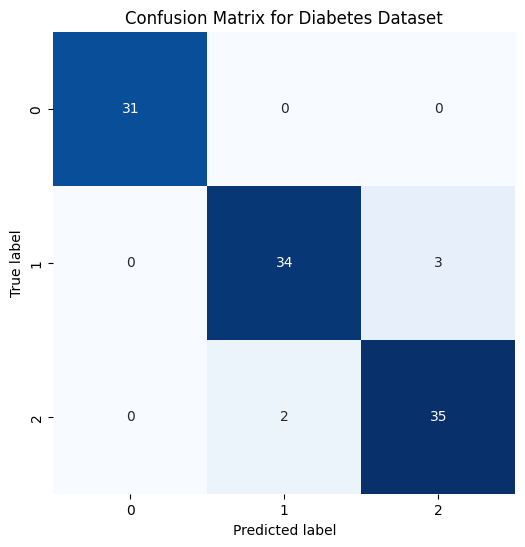

In [12]:
conf_matrix = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False, square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Diabetes Dataset')
plt.show()

### Accuracy Score

In [13]:
print(f"accuraycy_score: {accuracy_score(y_train, y_pred_train)}")

accuraycy_score: 0.9523809523809523


## Evaluation on the test set

In [14]:
# Model predictions on the test set
y_pred_test = mlp.predict(X_test)

# Check on 10 instances
print("Input: " + str(X_test[0:9]))
print("Output: " + str(y_pred_test[0:9]))
print("True value: " + str(y_test[0:9].values))

Input: [[ 0.3100623  -0.50256349  0.484213   -0.05282593]
 [-0.17225683  1.89603497 -1.26695916 -1.27039917]
 [ 2.23933883 -0.98228318  1.76840592  1.43531914]
 [ 0.18948252 -0.26270364  0.36746819  0.35303182]
 [ 1.15412078 -0.50256349  0.54258541  0.2177459 ]
 [-0.53399618  0.93659559 -1.38370397 -1.13511325]
 [-0.29283662 -0.26270364 -0.15788346  0.08245999]
 [ 1.27470056  0.21701605  0.71770262  1.43531914]
 [ 0.43064208 -1.94172256  0.36746819  0.35303182]]
Output: [1 0 2 1 1 0 1 2 1]
True value: [1 0 2 1 1 0 1 2 1]


### Confusion matrix

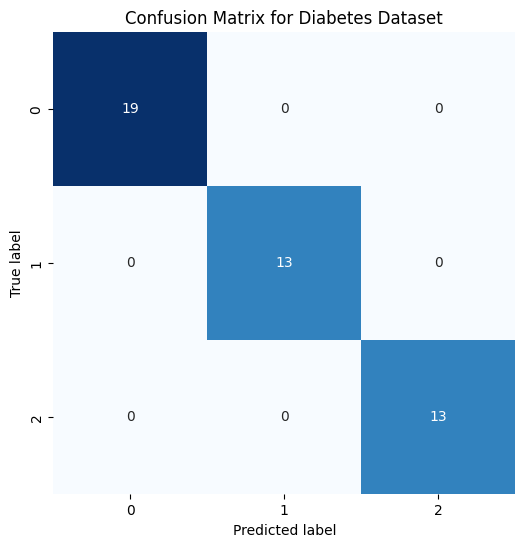

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False, square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Diabetes Dataset')
plt.show()

### Accuracy Score

In [16]:
print(f"accuraycy_score: {accuracy_score(y_test, y_pred_test)}")

accuraycy_score: 1.0


# Predict on a new data point

In [17]:
dict_labels = {}
for i, label in enumerate(labels):
    dict_labels[i] = label
dict_labels

{0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')}

In [18]:
new_data_point = scaler.transform([[5.0, 3.5, 1.5, 0.2]])
predicted = mlp.predict(new_data_point)
print(f"The predicted class for this flower is: {dict_labels[predicted[0]]}")

The predicted class for this flower is: setosa
